# Linearer Regressionsalgorithmus mit Boston Housing Dataset

Importieren der erforderlichen Bibliotheken

In [2807]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,explained_variance_score,median_absolute_error

**Datensatz** einlesen und ausgeben

In [2808]:
data = pd.read_csv('~/Downloads/boston.csv') 
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Datensatz bereinigen

In [2809]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [2810]:
dublicate_data = data.copy()
dublicate_data.drop_duplicates(subset=None,inplace=True)

In [2811]:
dublicate_data.shape

(506, 14)

In [2812]:
data.shape

(506, 14)

## Features und Target
- {`CRIM`, `ZN`, `INDUS`, `CHAS`, `NOX`, `RM`, `AGE`, `DIS`, `RAD`, `TAX`, `PTRATIO`, `B`, `LSTAT`} = Features/x
- `MEDV` = Target/y

In [2813]:
x = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = data[['MEDV']] #features und zielvariable setzen

Streudiagramme ausgeben, um **Korrelation *r*** zwischen dem Target und den einzelnen Features zu ermitteln

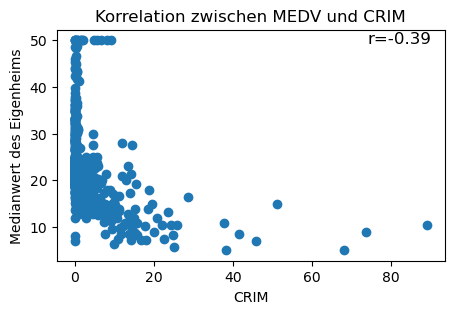

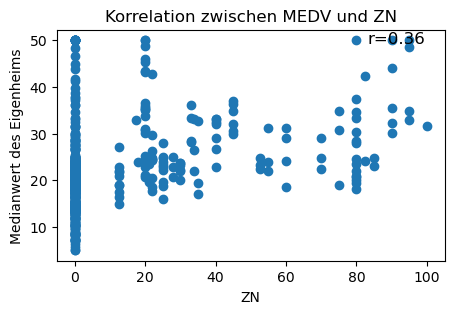

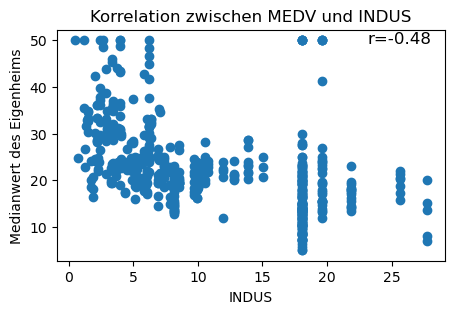

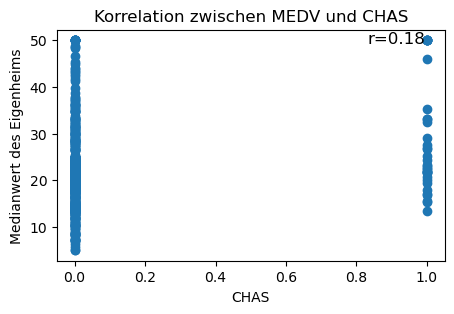

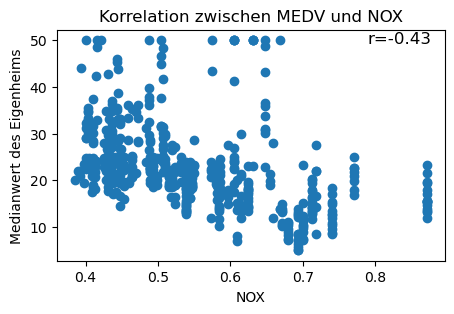

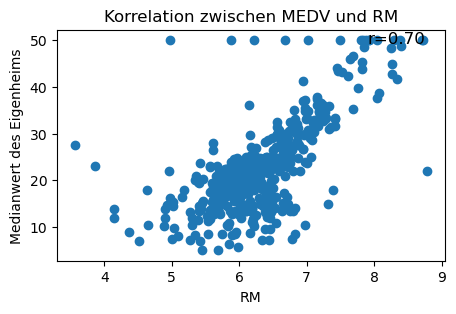

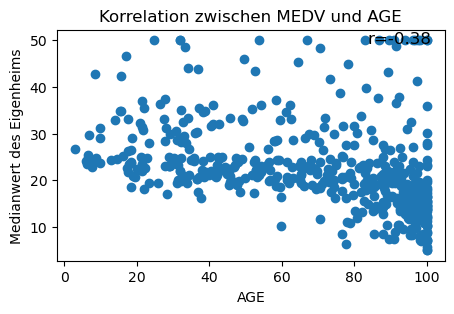

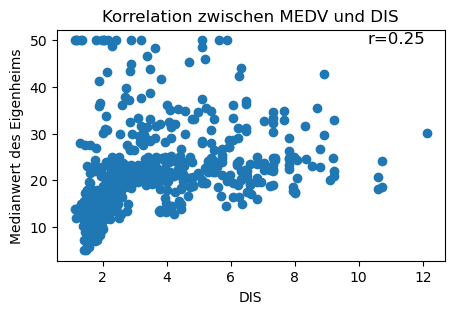

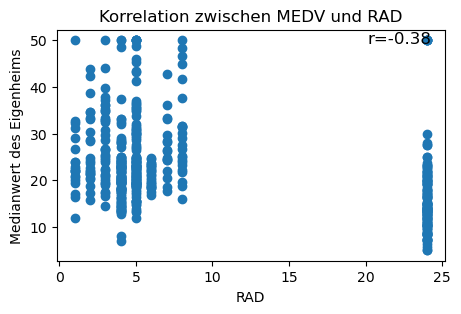

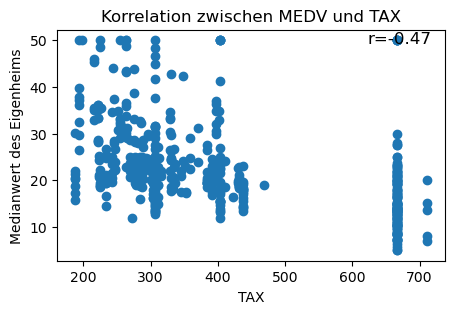

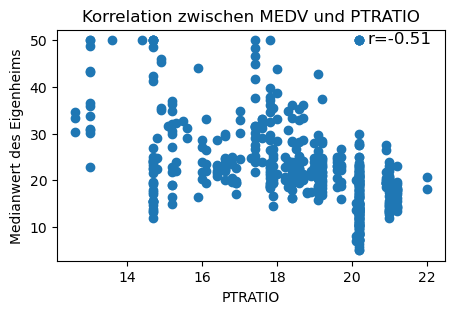

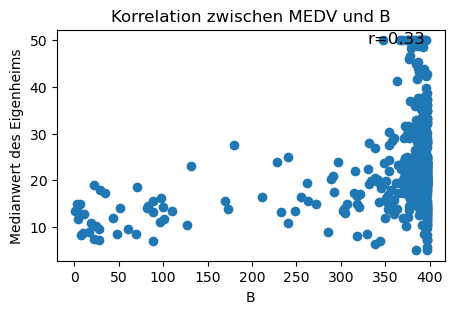

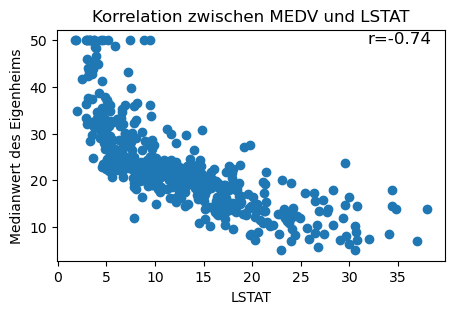

In [2814]:

for feature in x:
    pt.figure(figsize=(5,3))

    # Create a scatter plot
    correlation = np.corrcoef(data["MEDV"], data[feature])[0, 1]
    pt.scatter(data[feature], data["MEDV"])

    # Add a title and labels to the axes
    pt.title("Korrelation zwischen MEDV und {}".format(feature, correlation))
    pt.xlabel(feature)
    pt.ylabel("Medianwert des Eigenheims")
    
    
    pt.annotate("r={:.2f}".format(correlation), (0.8, 0.94),
                    xycoords="axes fraction",
                    fontsize=12,
                    color="black")

    # Show the plot
    pt.show()


/home/dimi67ch/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


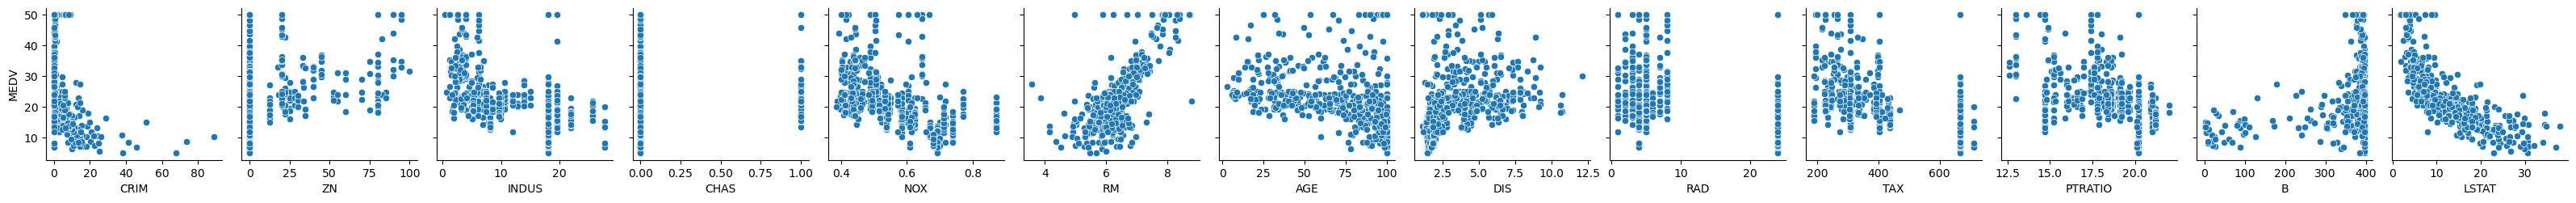

In [2815]:
sns.pairplot(data, y_vars=y, x_vars=x)
pt.show()

Features-Array auf die Korrelationsstärksten Features beschränken

In [2816]:
x = data[['RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

**Trainingsdaten** und **Testdaten** splitten

In [2817]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3) #splittung in training und test daten

## Algorithmus trainieren
- Modell erstellen und trainieren

In [2818]:
lr = LinearRegression()
# Trainieren des LinearRegression-Objekts
lr.fit(x_train, y_train)

LinearRegression()

In [2819]:
lr.coef_

array([[ 4.64813589, -0.02466701, -0.90385087,  0.29459773, -0.01547457,
        -0.75885535,  0.00977371, -0.53185112]])

Algorithmus berechent Vorhersagen (`Predictions`), anhand von `x_test` und tut die ersten *n* Predictions (Vorhersagen) ausgeben

In [2820]:
predictions = lr.predict(x_test) #tut von x test vorhersagen treffen und mit y_test also die echten werte vergleichen
n=10
print(predictions[0:n]) #gibt die ersten 8 vorhersagen
print(y_test[0:n]) # die ersten 8 tatsächliche werte


[[ 8.10995561]
 [17.50777403]
 [12.68379954]
 [17.5084717 ]
 [17.6123489 ]
 [19.58452991]
 [21.05401703]
 [38.34979269]
 [10.6794231 ]
 [33.64582452]]
     MEDV
48   14.4
436   9.6
54   18.9
419   8.4
207  22.5
401   7.2
151  19.6
162  50.0
8    16.5
273  35.2


Präzision der Vorhersagen ausgeben

In [2821]:
lr.score(x_test,y_test)
#prozent an genauigkeit der vorhersage

0.7392289653866877

In [2822]:
lr.coef_

array([[ 4.64813589, -0.02466701, -0.90385087,  0.29459773, -0.01547457,
        -0.75885535,  0.00977371, -0.53185112]])

In [2823]:
mean_squared_error(y_test,predictions)
#gibt prozent an durchschnittliche quadratische abweichung von tatsächlichen werten
#gewichtet größere fehler höher wegen quadrieren

26.3697719944513

In [2824]:
mean_absolute_error(y_test, predictions)
#prozent der  durchschnittlichen absoluten abweichung von den Ergebnissen

3.9178444767362217

In [2825]:
score = r2_score(y_test, predictions)
print(score)

0.7392289653866877


In [2826]:
score = explained_variance_score(y_test, predictions)
print(score)

0.7483288478901339


In [2827]:
score = median_absolute_error(y_test, predictions)
print(score)

3.0471526144074375


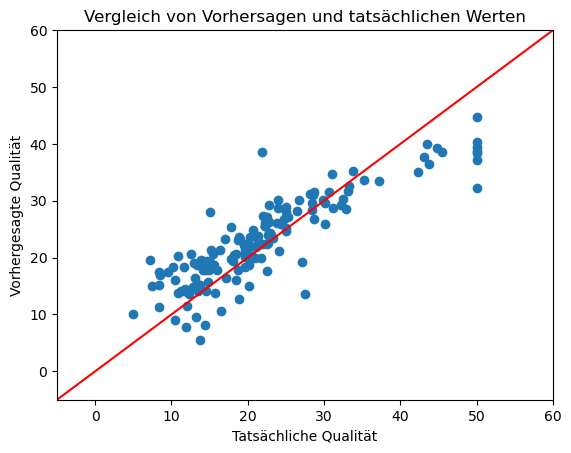

In [2828]:
pt.scatter(y_test, predictions)
pt.xlim(-5, 60)
pt.ylim(-5, 60)
pt.xlabel('Tatsächliche Qualität')
pt.ylabel('Vorhergesagte Qualität')
pt.title('Vergleich von Vorhersagen und tatsächlichen Werten')
pt.plot([-5, 60], [-5, 60], 'r')
pt.show()